In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from statsmodels.tsa.api import ExponentialSmoothing
from statsmodels.graphics.tsaplots import plot_acf
from sklearn.metrics import mean_absolute_error, mean_squared_error
from statsmodels.tsa.seasonal import seasonal_decompose

In [ ]:
#Leer archivo excel y crear DataFrame
data = pd.read_excel('data.xlsx')

#Convertir la columna 'Fecha' a tipo de dato datetime
data['Fecha'] = pd.to_datetime(data['Fecha'])

#Establecer 'Fecha' como índice del DataFrame
data.set_index('Fecha',inplace=True)

#Lista que guarda los periodos
periodos = [i for i in range(1,49)]

print(data.head())

            Ventas
Fecha             
2019-01-01  1200.0
2019-02-01  1350.0
2019-03-01  1250.0
2019-04-01  1300.0
2019-05-01  1400.0


# a)

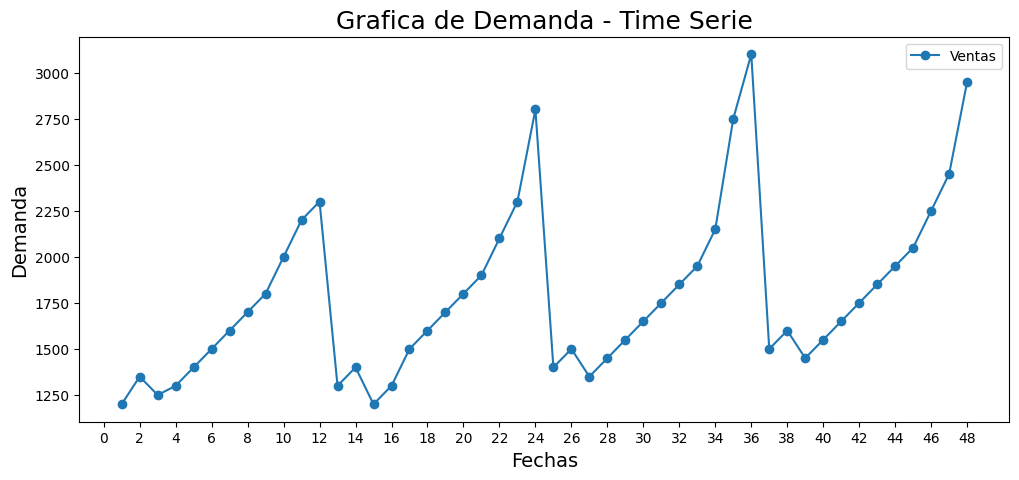

In [ ]:
#Graficar la data
plt.figure(figsize=(12,5))
plt.plot(periodos,data.iloc[:48]['Ventas'],'o-',label="Ventas")

#Nombres de gráfico y ejes.
plt.xlabel("Fechas",fontsize=14)
plt.ylabel("Demanda",fontsize=14)
plt.xticks(range(0, 12*4+2, 2))
plt.title("Grafica de Demanda - Time Serie",fontsize=18)
plt.legend(loc='best')
plt.show()

**¿Existe estacionalidad y/o tendencia?**

Es posible apreciar un patrón repetitivo en las ventas, por lo que indica que existe estacionalidad. También existe una tendencia al alza en las ventas de la compañía.

**En el caso de que exista estacionalidad ¿cada cuantos periodos se repite el patrón de estacionalidad?**

Cada 12 periodos.

**¿Qué otra herramienta puede utilizar para respaldar su respuesta?**

ACF y gráfico de descomposición

<Figure size 1000x600 with 0 Axes>

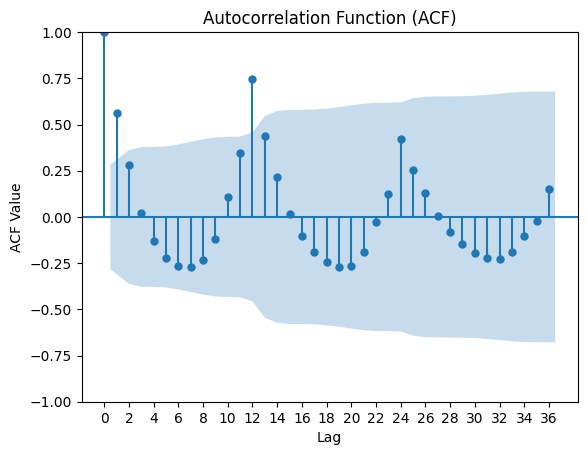

In [ ]:
#Visualizar la función de autocorrelación (ACF)

plt.figure(figsize=(10, 6))
plot_acf(data.iloc[:48]['Ventas'], lags=36)
plt.title('Autocorrelation Function (ACF)')
plt.xlabel('Lag')
plt.ylabel('ACF Value')
plt.xticks(range(0, 38, 2))  #Establecer ticks en el eje x de 1 en 1
plt.show()

Se puede notar que existe una gran autocorrelación en las ventas de un intervalo de 12 meses, lo cual confirma, la estacionalidad y su número de frecuencia.

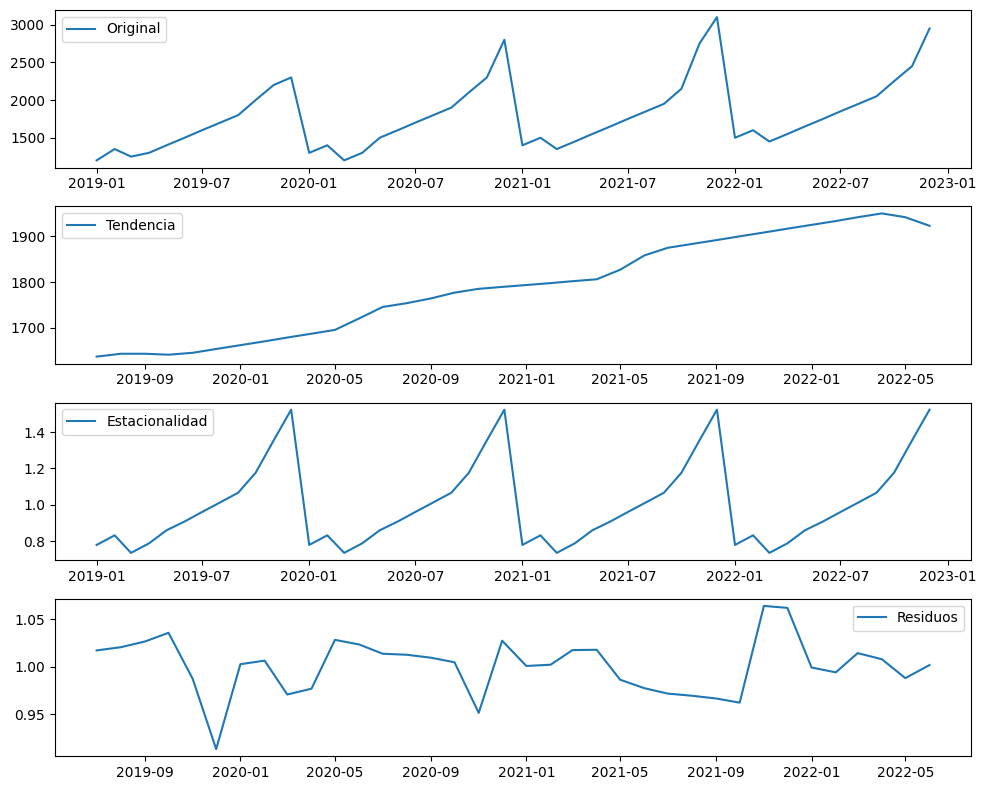

In [ ]:
#Realizar la descomposición
result = seasonal_decompose(data.iloc[:48]['Ventas'], model='mul')

# Graficar la descomposición
plt.figure(figsize=(10, 8))

plt.subplot(4, 1, 1)
plt.plot(data, label='Original')
plt.legend()

plt.subplot(4, 1, 2)
plt.plot(result.trend, label='Tendencia')
plt.legend()

plt.subplot(4, 1, 3)
plt.plot(result.seasonal, label='Estacionalidad')
plt.legend()

plt.subplot(4, 1, 4)
plt.plot(result.resid, label='Residuos')
plt.legend()

plt.tight_layout()
plt.show()

# b)

**Entrene el modelo y luego evalúelo: Entrene el modelo con los datos de los primeros 3 años, es decir, desde el 01-01-2019 hasta el 01-12-2021 (ambos inclusive).**

In [ ]:
#Dividimos la data de entrenamiento, y la data de pronostico

train = data.iloc[:12*3]

#Crear y ajustar el modelo de Holt-Winters
model = ExponentialSmoothing(train['Ventas'],trend='add', seasonal = 'mul',seasonal_periods=12).fit(
    smoothing_level=0.7588,smoothing_trend=0.0008,smoothing_seasonal=0.0003)

**Posteriormente evalúe el modelo con los datos del 4to año (2022) con las métricas MAE, MSE, RMSE y MAPE. Además gráfique.**

In [ ]:
#Pronosticar valores para el conjunto de prueba

test = data[12*3:]

forecast = model.forecast(len(test))

#print(test)
data['Pronostico'] = forecast
print()
print(data)


            Ventas   Pronostico
Fecha                          
2019-01-01  1200.0          NaN
2019-02-01  1350.0          NaN
2019-03-01  1250.0          NaN
2019-04-01  1300.0          NaN
2019-05-01  1400.0          NaN
2019-06-01  1500.0          NaN
2019-07-01  1600.0          NaN
2019-08-01  1700.0          NaN
2019-09-01  1800.0          NaN
2019-10-01  2000.0          NaN
2019-11-01  2200.0          NaN
2019-12-01  2300.0          NaN
2020-01-01  1300.0          NaN
2020-02-01  1400.0          NaN
2020-03-01  1200.0          NaN
2020-04-01  1300.0          NaN
2020-05-01  1500.0          NaN
2020-06-01  1600.0          NaN
2020-07-01  1700.0          NaN
2020-08-01  1800.0          NaN
2020-09-01  1900.0          NaN
2020-10-01  2100.0          NaN
2020-11-01  2300.0          NaN
2020-12-01  2800.0          NaN
2021-01-01  1400.0          NaN
2021-02-01  1500.0          NaN
2021-03-01  1350.0          NaN
2021-04-01  1450.0          NaN
2021-05-01  1550.0          NaN
2021-06

In [ ]:
# Calcular el MAE
mae = round(mean_absolute_error(data.iloc[36:48]["Ventas"], data.iloc[36:48]['Pronostico']),2)
print(f"MAE: {mae}")

# Calcular el MSE
mse = round(mean_squared_error(data.iloc[36:48]["Ventas"], data.iloc[36:48]['Pronostico']),2)
print(f"MSE: {mse}")

# Calcular el RMSE
rmse = round(np.sqrt(mse),2)
print(f"RMSE: {rmse}")

# Calcular el MAPE manualmente
Mapes = (abs(data.iloc[36:48]["Ventas"]-data.iloc[36:48]['Pronostico']) / data.iloc[36:48]["Ventas"]) * 100
mape = round(Mapes.mean(),2)
print(f"MAPE: {mape}%")

MAE: 223.9
MSE: 62320.81
RMSE: 249.64
MAPE: 11.14%


**c)	Genere un pronostico para cada mes del año 2023, gráfique y concluya.**

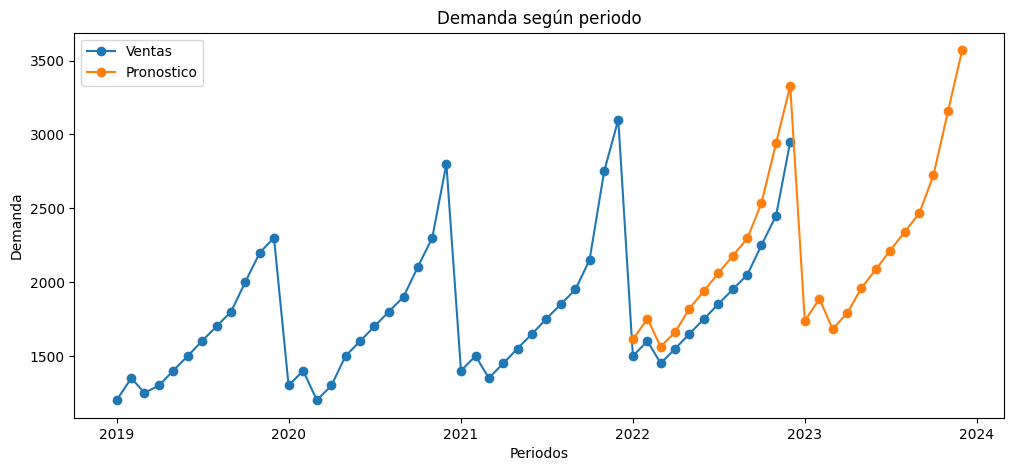

In [ ]:
#Graficar la data
plt.figure(figsize=(12,5))
plt.plot(data.index,data['Ventas'],'o-',label="Ventas")
plt.plot(data.index,data['Pronostico'],'o-',label="Pronostico")

plt.xlabel('Periodos')
plt.ylabel('Demanda')
plt.title('Demanda según periodo')
plt.legend()
plt.show()

El error porcentual del pronóstico es del 11.14%, cifra que se mantiene dentro de un rango aceptable. Además, se observa que el modelo tiende a sobreestimar la demanda. Esto sugiere que, si este modelo se considera como el único factor de decisión, es probable que se cumpla con la demanda del cliente. No obstante, es esencial ejercer precaución para evitar costos elevados de almacenamiento en inventario.